In [16]:
import scipy
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [2]:
rc = pd.read_csv('data/RC.csv')

In [3]:
rc.describe()

,Date,Cost Index,Year Composite
count,129.000000,129.000000,129.000000
mean,1954.000000,65.515839,308.655323
std,37.383151,19.288464,568.733520
min,1890.000000,32.805185,4.233333
25%,1922.000000,49.420634,9.235000
50%,1954.000000,64.044606,29.689167
75%,1986.000000,82.794848,236.358333
max,2018.000000,100.568840,2744.680000


In [4]:
scaler=MinMaxScaler()
#fit scaler
scaler.fit(rc[['Cost Index', 'Year Composite']])
#transformed scaled data
rc_scaled=scaler.transform(rc[['Cost Index', 'Year Composite']])

#rever to dataframe
rc_scaled = pd.DataFrame(rc_scaled, columns=['Cost Index', 'Year Composite'])
rc_scaled['Date']=rc.Date
rc_scaled.head()

,Cost Index,Year Composite,Date
0,0.861429,1.000000,2018
1,0.846391,0.891820,2017
2,0.836152,0.761778,2016
3,0.824170,0.750595,2015
4,0.791969,0.702964,2014


## Linear Regression

In [8]:
x= rc_scaled['Year Composite']
y= rc_scaled['Cost Index']


result = scipy.stats.linregress(x, y)

In [10]:
display(
result.slope,

result.intercept,

result.rvalue,

result.pvalue,

result.stderr
)

0.6969891912668977

0.40529187785778353

0.5081742916268341

7.864393084155738e-10

0.10481969027977252

In [11]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [12]:
slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)

In [13]:
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
line

'Regression line: y=0.41+0.70x, r=0.51'

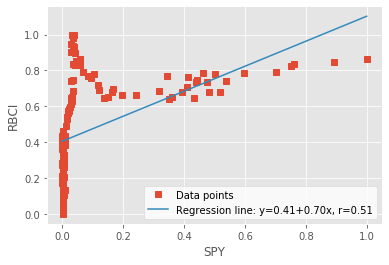

In [21]:
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='s', label='Data points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('SPY')
ax.set_ylabel('RBCI')
ax.legend(facecolor='white')
plt.show()